In [22]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
train_user_data = pd.read_csv('users.csv')
train_busi_data = pd.read_csv('business.csv')
train_sc_data = pd.read_csv('train_reviews.csv')
test_data = pd.read_csv('test_queries.csv')
#test_data = pd.read_csv('data/HTestLastNoY.csv')

print(train_user_data.shape)
display(train_user_data.head(1))
display(train_user_data.info())
#print(test_data.shape)
#display(test_data.head(1))
# display(test_data.info())

(41720, 22)


,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.83,0,0,0,0,0,0,0,0,1,...,0,None,0,None,2,James,6,7,UxfpKHGO2dfQCdS9xLLJow,2012-04-25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41720 entries, 0 to 41719
Data columns (total 22 columns):
average_stars         41720 non-null float64
compliment_cool       41720 non-null int64
compliment_cute       41720 non-null int64
compliment_funny      41720 non-null int64
compliment_hot        41720 non-null int64
compliment_list       41720 non-null int64
compliment_more       41720 non-null int64
compliment_note       41720 non-null int64
compliment_photos     41720 non-null int64
compliment_plain      41720 non-null int64
compliment_profile    41720 non-null int64
compliment_writer     41720 non-null int64
cool                  41720 non-null int64
elite                 41720 non-null object
fans                  41720 non-null int64
friends               41720 non-null object
funny                 41720 non-null int64
name                  41705 non-null object
review_count          41720 non-null int64
useful                41720 non-null int64
user_id               4172

None

In [24]:
print(test_data.shape)
display(test_data.head(1))
display(test_data.info())

(50078, 2)


,user_id,business_id
0,XEDaNNCTVAqPpvyX2zY03g,e880MGw6C6PJL-n3EJoY_g


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50078 entries, 0 to 50077
Data columns (total 2 columns):
user_id        50078 non-null object
business_id    50078 non-null object
dtypes: object(2)
memory usage: 782.5+ KB


None

In [25]:
print(train_busi_data.shape)
display(train_busi_data.head(1))
display(train_busi_data.info())
display(train_busi_data['city'].head())

(12058, 61)


,address,attributes,attributes_AcceptsInsurance,attributes_AgesAllowed,attributes_Alcohol,attributes_Ambience,attributes_BYOB,attributes_BYOBCorkage,attributes_BestNights,attributes_BikeParking,...,hours_Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,595 Markham Street,NaN,NaN,NaN,full_bar,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,...,17:0-1:0,0,43.664125,-79.411886,Southern Accent Restaurant,Palmerston,M6G 2L7,146,4.0,ON


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12058 entries, 0 to 12057
Data columns (total 61 columns):
address                                  11954 non-null object
attributes                               0 non-null float64
attributes_AcceptsInsurance              170 non-null object
attributes_AgesAllowed                   66 non-null object
attributes_Alcohol                       9258 non-null object
attributes_Ambience                      9072 non-null object
attributes_BYOB                          544 non-null object
attributes_BYOBCorkage                   840 non-null object
attributes_BestNights                    2025 non-null object
attributes_BikeParking                   10596 non-null object
attributes_BusinessAcceptsBitcoin        1812 non-null object
attributes_BusinessAcceptsCreditCards    11476 non-null object
attributes_BusinessParking               10775 non-null object
attributes_ByAppointmentOnly             1338 non-null object
attributes_Caters         

None

0        Toronto
1        Phoenix
2    Sun Prairie
3      Las Vegas
4        Phoenix
Name: city, dtype: object

In [26]:
print(train_sc_data.shape)
display(train_sc_data.head(1))
display(train_sc_data.info())

(150232, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,WPCgtEG-bJt0cZtnM-x7yw,0,2005-03-04,0.0,6sferX8QOJq9g5PONKZH4w,4.0,There is nothing better than happy hour on the...,0.0,VDh1vjzpNUJH6HfcjH8g7Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150232 entries, 0 to 150231
Data columns (total 9 columns):
business_id    150232 non-null object
cool           150232 non-null int64
date           150232 non-null object
funny          150232 non-null float64
review_id      150232 non-null object
stars          150232 non-null float64
text           150232 non-null object
useful         150232 non-null float64
user_id        150232 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 10.3+ MB


None

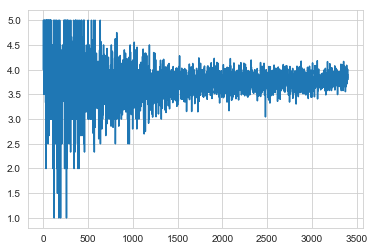

In [62]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

new_sc_data = train_sc_data
train_sc_group = train_sc_data.groupby(['date'])
t = dict(list(train_sc_group))
#print(t.keys())
#print(t['2015-10-31'].keys())
t_stars = {}
ts = []
for key,item in t.items():
    t_stars[key] = np.mean(item['stars'])
    ts.append(np.mean(item['stars']))
   

plt.plot(ts)



Text(0.5,0.98,'Average Rating for Each City')

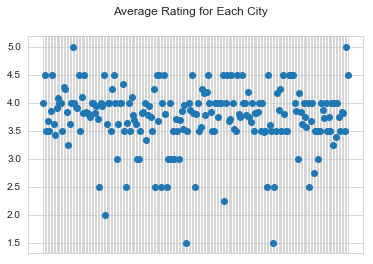

In [29]:
train_busi_group = train_busi_data.groupby(['city'])
t = dict(list(train_busi_group))
#print(t.keys())
#print(t['2015-10-31'].keys())
names = list(t.keys())
values = []
for key,value in t.items():
    values.append(np.mean(value['stars']))
    
#print(values[0:50])
fig, ax = plt.subplots()
ax.scatter(names, values)
#axs[2].plot(names, values)
ax.set_xticklabels([])
fig.suptitle('Average Rating for Each City')
#fig.axes.get_xaxis().set_visible(False)
   

Text(0.5,1,'Carnegie')

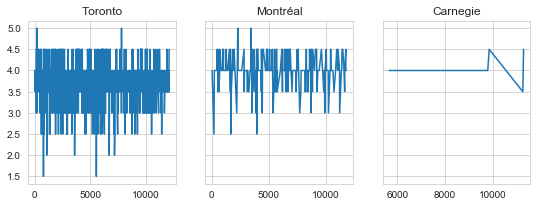

In [21]:
a = t['Toronto']
b = t['Montréal']
c = t['Carnegie']
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].plot(a['stars'])
axs[0].set_title('Toronto')
axs[1].plot(b['stars'])
axs[1].set_title('Montréal')
axs[2].plot(c['stars'])
axs[2].set_title('Carnegie')
#print(t.keys())

In [91]:
display(train_sc_data['text'])

0         There is nothing better than happy hour on the...
1         You know you're in for a fun experience as soo...
2         Vegas has become a massive theme park, where e...
3         Having stayed at most of the theme park-like V...
4         Andre's Monte Carlo, voted the #1 restaurant i...
5         With the Willow Stream Spa and Fitness Center,...
6         Speechless. Unlike other Vegas hotels who tend...
7         This tiny, unpretentious Cuban restaurant is h...
8         The decor is an odd mix of Arizona ranch and C...
9         DAMN expensive but damn good to match.  If you...
10        Just about as good as a steak house can get, t...
11        Retro is the word.  Looks like it got a great ...
12        Good bar food.  We ordered lots.  Sliders were...
13        Combining a visit here with a drive through Va...
14        My first trip to Vegas was so long ago that Mc...
15        One of the most surrealistic experiences I've ...
16        That there's a two-and-a-half-